In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
data = pd.read_csv(
    r'C:\Users\25492\Desktop\2024年第四届长三角高校数学建模竞赛赛题\2024长三角选题B：人工智能范式的物理化学家\data.csv')
data

,id,class,y1,y2,y3,x1,x2,x3,x4,x5,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100
0,1,2,-587.360784,-0.331308,0.018453,0.136518,0.000059,0.349761,-587.313385,68.127640,...,121.932271,39.136162,167.944447,810.320131,1310.347942,28259.325400,2204.278945,21606.405010,16746.254820,213.098000
1,2,2,-587.359946,-0.329316,0.020334,0.135966,0.000060,0.349651,-587.313067,68.406902,...,193.540254,33.530111,820.070309,332.223854,1224.970065,19185.769380,2076.587979,17602.163970,2199.601888,506.651409
2,3,2,-587.366330,-0.324781,0.024104,0.136758,0.000058,0.348885,-587.319604,67.688007,...,187.885229,15.181060,149.626389,1935.124281,3766.649406,10780.248220,497.946181,16759.458980,17687.268850,575.511247
3,4,1,-534.430563,-0.323772,0.076703,0.166028,0.000058,0.400475,-534.384191,66.933953,...,53.692333,48.561113,240.029692,2747.138536,2553.341043,7180.522100,2518.506658,37359.799660,5784.140268,530.878047
4,5,2,-838.152165,-0.323753,-0.038820,0.169158,0.000067,0.284934,-838.102038,90.368137,...,7.836116,48.199369,490.018016,1496.939717,1507.517227,24619.776720,2971.889099,36697.285060,17496.357370,640.112190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,1,-419.504748,-0.152722,-0.025667,0.169241,0.000055,0.127055,-419.459364,79.538702,...,63.361697,39.151228,94.862755,1968.900543,501.442536,14489.037340,1554.543619,26717.867000,6227.496125,548.720052
199996,199997,1,-419.494291,-0.152693,-0.018547,0.168173,0.000059,0.134146,-419.448829,78.753240,...,110.211710,0.088873,139.355293,1608.385691,1017.910470,19022.048140,2359.630960,22182.780890,19762.010290,194.794578
199997,199998,2,-406.836695,-0.152680,-0.041361,0.233604,0.000067,0.111320,-406.786417,108.276082,...,13.798549,37.889274,828.723926,2080.905500,776.676895,11712.821270,2686.690842,3036.807908,2058.707100,474.257489
199998,199999,1,-440.592967,-0.152678,-0.008569,0.180136,0.000060,0.144109,-440.548209,76.762032,...,29.168705,15.882359,654.330446,620.222337,2396.827918,6858.319928,1065.978203,9818.305268,6949.049915,502.028596


In [10]:
X = data.iloc[:, 5:]
Y = data.iloc[:, 2]
Y

0        -587.360784
1        -587.359946
2        -587.366330
3        -534.430563
4        -838.152165
             ...    
199995   -419.504748
199996   -419.494291
199997   -406.836695
199998   -440.592967
199999   -463.293589
Name: y1, Length: 200000, dtype: float64

# 1.相关系数分析

In [11]:
n = X.shape[1]
S = np.zeros((n, 2))
P = np.zeros((n, 2))
for i in range(n):
    S[i, 0]= np.abs(stats.spearmanr(X.iloc[:, i], Y)[0])  # 斯皮尔曼相关系数
    S[i, 1] = stats.spearmanr(X.iloc[:, i], Y)[1]  # 斯皮尔曼p值
    P[i, 0] = np.abs(stats.pearsonr(X.iloc[:, i], Y)[0])  # 皮尔逊相关系数 
    P[i, 1] = stats.pearsonr(X.iloc[:, i], Y)[1]  # 皮尔逊p值

In [12]:
# 斯皮尔曼系数处理
S = pd.DataFrame(S, columns=['correlation', 'p_value'])
S = S[S['p_value'] <= 0.05]  # 只选择置信度小于0.05的指标
S = S.sort_values(by=['correlation'],ascending=False) # 进行排序
print(S)
#S.to_csv('斯皮尔曼.csv')

    correlation   p_value
5      1.000000  0.000000
3      0.999999  0.000000
6      0.999999  0.000000
8      0.413150  0.000000
7      0.285593  0.000000
0      0.218948  0.000000
1      0.182706  0.000000
2      0.126111  0.000000
4      0.119146  0.000000
22     0.007838  0.000456
82     0.005829  0.009135
66     0.005601  0.012244
20     0.005148  0.021332
77     0.004699  0.035598
40     0.004664  0.036990
23     0.004520  0.043246
11     0.004447  0.046707
95     0.004399  0.049128
36     0.004387  0.049752


In [6]:
# 皮尔逊系数
P = pd.DataFrame(P, columns=['correlation', 'p_value'])
P = P[P['p_value'] <= 0.05]
P = P.sort_values(by=['correlation'],ascending=False)
print(P)

    correlation        p_value
5      1.000000   0.000000e+00
3      1.000000   0.000000e+00
6      1.000000   0.000000e+00
8      0.434023   0.000000e+00
4      0.343003   0.000000e+00
0      0.299936   0.000000e+00
2      0.207049   0.000000e+00
7      0.193622   0.000000e+00
1      0.079704  3.772453e-279
77     0.006503   3.634674e-03
95     0.006081   6.541872e-03
44     0.005392   1.588992e-02
36     0.005235   1.922052e-02
23     0.005148   2.132581e-02
82     0.004963   2.644173e-02
22     0.004743   3.389775e-02


In [7]:
# 选取斯皮尔曼相关系数前十的指标
index = S.index[:10]
X = X.iloc[:,index]
X

,x6,x4,x7,x9,x8,x1,x2,x3,x5,x23
0,-587.323859,-587.313385,-587.312441,1578.326219,3.690374,0.136518,0.000059,0.349761,68.127640,14376.080930
1,-587.323542,-587.313067,-587.312123,1422.590010,3.720941,0.135966,0.000060,0.349651,68.406902,5703.094391
2,-587.329854,-587.319604,-587.318660,1702.112816,3.111271,0.136758,0.000058,0.348885,67.688007,14229.442550
3,-534.394372,-534.384191,-534.383246,1432.356648,2.187990,0.166028,0.000058,0.400475,66.933953,14865.618630
4,-838.113854,-838.102038,-838.101093,1871.002915,4.485350,0.169158,0.000067,0.284934,90.368137,7678.496056
...,...,...,...,...,...,...,...,...,...,...
199995,-419.468874,-419.459364,-419.458420,1364.165906,3.991411,0.169241,0.000055,0.127055,79.538702,13677.104380
199996,-419.458752,-419.448829,-419.447884,1296.958436,5.784022,0.168173,0.000059,0.134146,78.753240,11699.031260
199997,-406.797683,-406.786417,-406.785473,2129.572047,1.670824,0.233604,0.000067,0.111320,108.276082,5574.152770
199998,-440.558158,-440.548209,-440.547265,1157.687053,4.513365,0.180136,0.000060,0.144109,76.762032,3006.882121


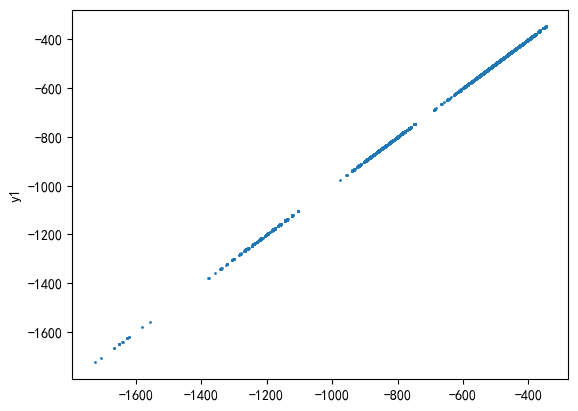

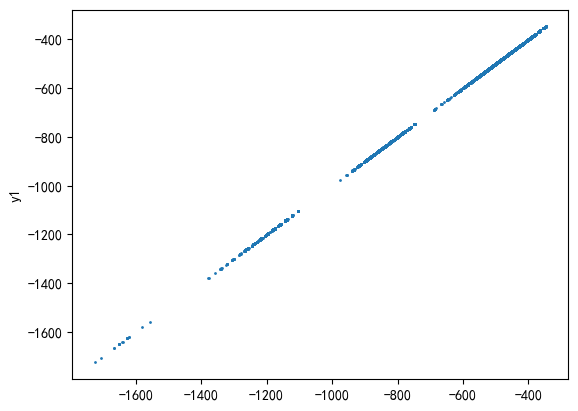

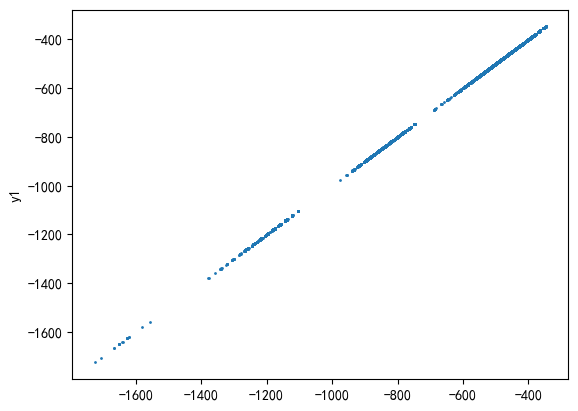

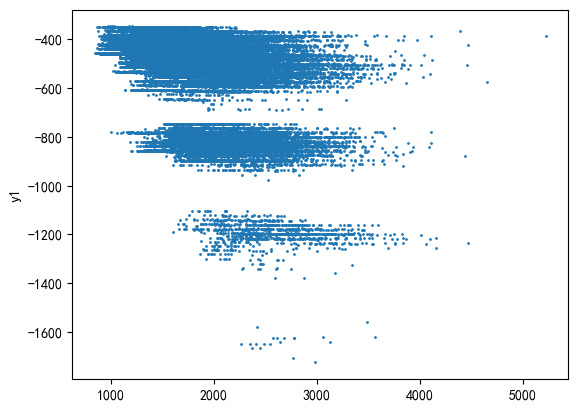

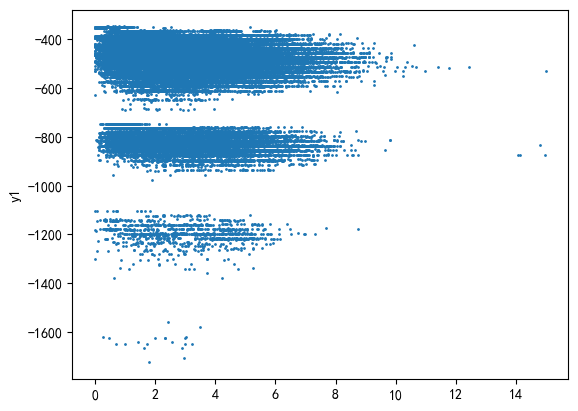

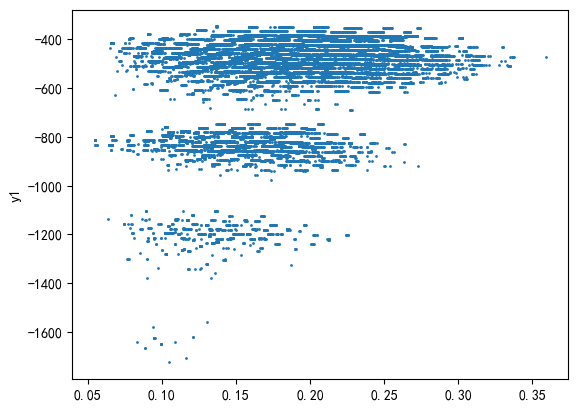

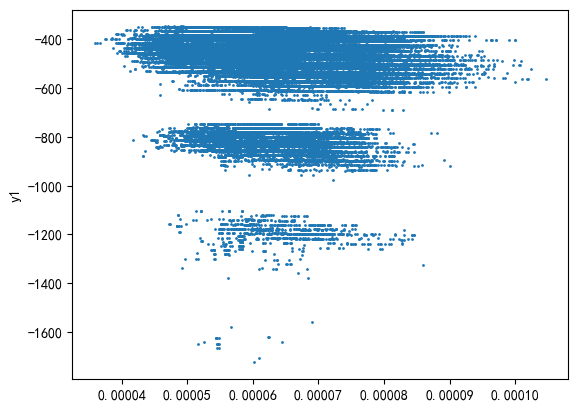

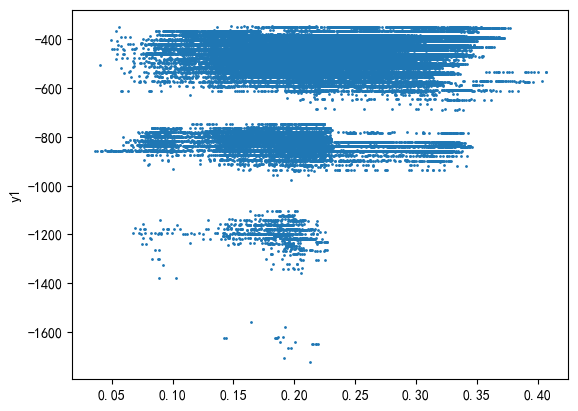

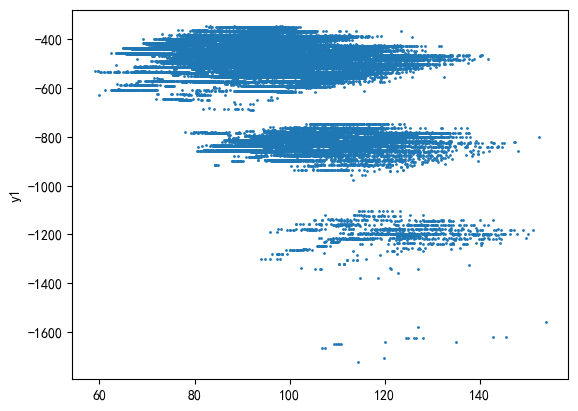

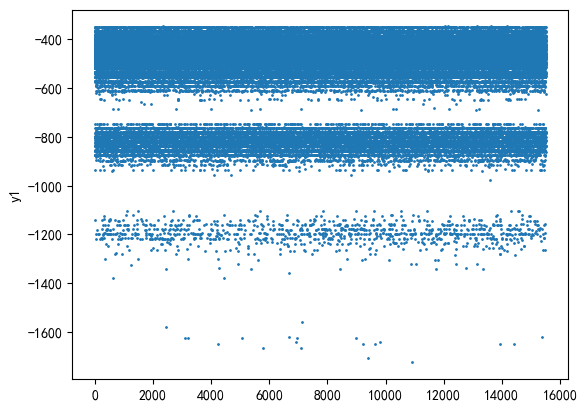

In [8]:
for i in range(X.shape[1]):
    plt.figure(i)
    plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
    plt.rcParams['axes.unicode_minus'] = False
    plt.scatter(X.iloc[:,i], Y, s=1)
    plt.ylabel('y1')
    plt.show()

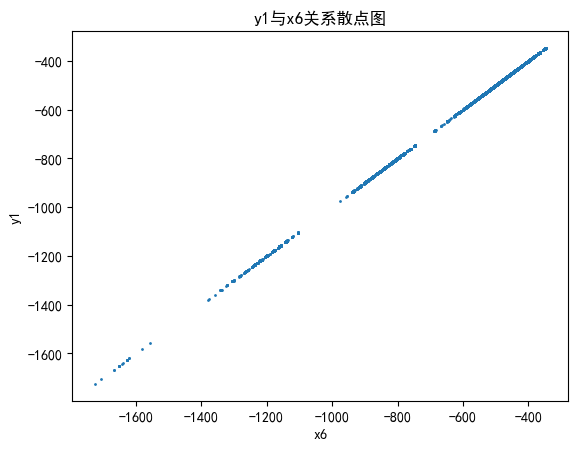

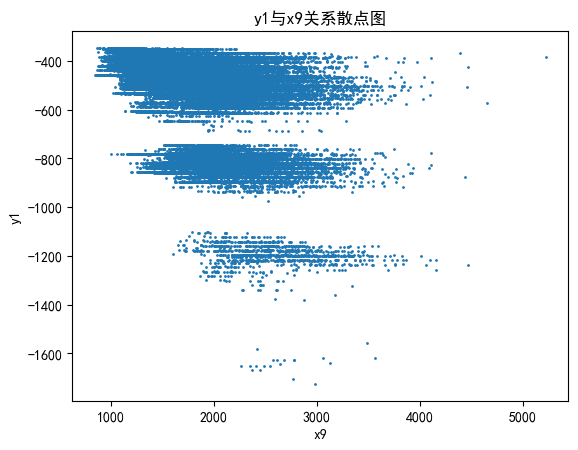

In [9]:
# 各指标与y1关系图
plt.figure(1)
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.title('y1与x6关系散点图')
plt.scatter(X.iloc[:,0], Y, s=1)
plt.ylabel('y1')
plt.xlabel('x6')
plt.savefig('y1与x6关系散点图.png')
plt.show()

plt.figure(2)
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.title('y1与x9关系散点图')
plt.scatter(X.iloc[:,3], Y, s=1)
plt.ylabel('y1')
plt.xlabel('x9')
plt.savefig('y1与x9关系散点图.png')
plt.show()

# 2.回归神经网络

In [9]:
from sklearn.neural_network import MLPRegressor as RNN 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score as cv 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as TTS
from time import time
import datetime
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

## 2.1交叉验证 

In [167]:
#标准化
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X)  
Xstandar = scaler.transform(X)
# apply same transformation to test data
# Xtest = scaler.transform(Xtest)
Xpre = scaler.transform(Xpre)

In [173]:
# 交叉验证
times = time()
rnn = RNN(hidden_layer_sizes=(100,100,100),random_state=420) #建立神经网络
print(cv(rnn,Xstandar,Y,cv=5).mean()) #交叉验证
print(time() - times) #计算时间

D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.9999533683858626
98.67263054847717


# 3. 回归决策树

## 3.1交叉验证

In [11]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [175]:
times = time()
dtc = DTC(max_depth=200)
print(cv(dtc,X,Y,cv=5).mean()) # 交叉验证
print(time()-times)

0.9999868511917038
10.297541379928589


## 3.2 预测

In [ ]:
# 预测集
data_pre = pd.read_csv(r'C:\Users\25492\Desktop\2024年第四届长三角高校数学建模竞赛赛题\2024长三角选题B：人工智能范式的物理化学家\predict.csv')
data_pre

# 预测指标
Xpre =  data_pre.iloc[:, 5:]
Xpre = Xpre.iloc[:,index]
Xpre

dtr = DTR(max_depth=200) #建立回归决策树
dtr.fit(X,Y)

In [191]:
Y_pre = dtr.predict(Xpre)
Y_pre

array([-368.7214642, -384.7849204, -367.4938539, ..., -398.529771 ,
       -477.0101416, -519.1182593])

In [ ]:
# 创建空的DataFrame
df = pd.DataFrame(Y_pre, columns=['y1'])
# 将DataFrame写入CSV文件
df.to_csv('y1_pre.csv', index=False)

## 3.3 测试效果可视化

#数据切分
Xtrain, Xtest, Ytrain, Ytest = TTS(X,Y,test_size=0.3,random_state=420)

In [184]:
dtr = DTR(max_depth=200)
dtr.fit(Xtrain,Ytrain)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=200),
                  n_estimators=300, random_state=420)

In [185]:
# 测试
Ytest_pre = abr.predict(Xtest)
Ytest_pre

array([-423.95764  , -404.6232767, -443.144447 , ..., -497.2860761,
       -386.6028371, -426.1349119])

In [186]:
# 测试评估
MAE = mean_absolute_error(Ytest,Ytest_pre)
MSE = mean_squared_error(Ytest,Ytest_pre)
MAPE = mean_absolute_percentage_error(Ytest,Ytest_pre)
print('MAE:',MAE)
print('MSE:',MSE)
print('MAPE:',MAPE)

MAE: 0.0038521118739358504
MSE: 0.022331276517245854
MAPE: 6.100280130857668e-06


NameError: name 'Ytest' is not defined

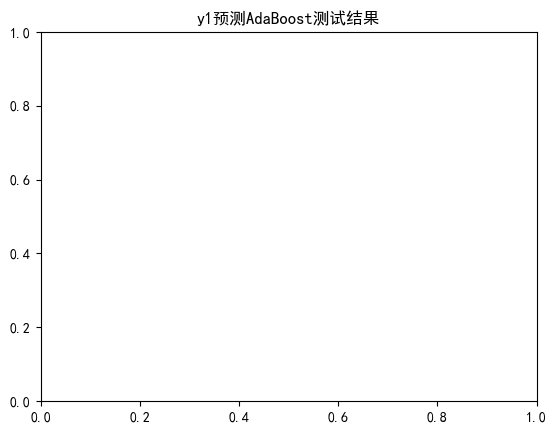

In [26]:
plt.figure(1)
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False
plt.title('y1预测AdaBoost测试结果')
plt.scatter(range(Ytest.shape[0]), Ytest, s=0.5)
plt.scatter(range(Ytest_pre.shape[0]), Ytest_pre, s=0.5)
plt.ylabel('y1')
plt.xlabel('id')
plt.legend(['真实值','预测值'])
plt.savefig('y1预测随机森林测试结果.png')
plt.show()